In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
target = train['target']
train.drop('target',axis=1,inplace=True)
idd= test['id']
all_data = pd.concat((train, test)).reset_index(drop=True)

In [3]:
all_data.drop('id',axis=1,inplace=True)
all_data.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,AX5_MNTMAR,RES_ANNIMP,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
0,49,14185,P,99,1,6101,4,2,2,2,...,0.0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,221,6032,P,99,0,6271,8,2,1,1,...,0.0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,181,8907,P,99,0,6102,4,2,2,2,...,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,252,5783,M,22,0,4403,4,2,2,2,...,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,234,1477,P,99,0,6312,8,2,2,1,...,0.0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("all_data size is : {}".format(all_data.shape))

all_data size is : (35791, 119)


In [5]:
cols_with_missing = [col for col in all_data.columns
                     if all_data[col].isnull().any()]



In [6]:
col_to_drop=[]
for col in cols_with_missing:
    perc = (all_data[col].isnull().sum()/len(all_data[col]))*100
    if perc>70:
        col_to_drop.append(col)
        


In [7]:
all_data.drop(col_to_drop,axis=1,inplace=True)

In [8]:
all_data.shape

(35791, 89)

In [9]:
col_object=[]
for col in all_data.columns:
    if all_data[col].dtype == 'object':
        col_object.append(col)

In [10]:
col_object

['CTR_CATEGO_X']

In [11]:
col_to_add = ['TVA_CHAF36','TVA_CHAF29','TVA_CHAF22','TVA_CHAF18','TVA_CHAF15','TVA_CAF125','TVA_CHAF12','TVA_CHAF10','TVA_CHAFF7','TVA_CHAFF6']
z=[]
for index, row in all_data.iterrows():
    z.append(row.TVA_CHAF36 + row.TVA_CHAF29+row.TVA_CHAF22+row.TVA_CHAF18+row.TVA_CHAF15+row.TVA_CAF125+row.TVA_CHAF12+row.TVA_CHAF10+row.TVA_CHAFF7+row.TVA_CHAFF6)
all_data['TVA_sum_average'] = z
all_data['TVA_sum_average'] = all_data['TVA_sum_average']/len(col_to_add)
all_data.drop(col_to_add,axis=1,inplace=True)

In [12]:
all_data.shape

(35791, 80)

In [13]:
coll = ['TVA_BASIMB','TVA_DEDIMB','TVA_BASEQL','TVA_DEDEQL','TVA_BASAUL','TVA_DEDAUL','TVA_BASAUI','TVA_DEDAUI','TVA_BASRSM','TVA_DEDRSM','TVA_RSNRES','TVA_TRSPOR','TVA_DEDREG','TVA_RESTIT']
col_to_add=[]
for r in coll:
    if r in all_data.columns:
        col_to_add.append(r)
        
    
z=[]
for index, row in all_data.iterrows():
    su = 0
    for h in col_to_add:
        su=su+row[h]
    z.append(su)
        
all_data['TVA_sum_average1'] = z
all_data['TVA_sum_average1'] = all_data['TVA_sum_average1']/len(col_to_add)
all_data['TVA_sum_average1'] = all_data['TVA_sum_average1']/len(col_to_add)
all_data.drop(col_to_add,axis=1,inplace=True)

In [14]:
all_data.shape

(35791, 67)

In [15]:
coll =['TVA_CA072018','TVA_CA132018','TVA_CA192018']
col_to_add=[]
for r in coll:
    if r in all_data.columns:
        col_to_add.append(r)    
z=[]
for index, row in all_data.iterrows():
    su = 0
    for h in col_to_add:
        su=su+row[h]
    z.append(su)
        
all_data['TVA_sum_average2'] = z
all_data['TVA_sum_average2'] = all_data['TVA_sum_average2']/len(col_to_add)
all_data.drop(col_to_add,axis=1,inplace=True)

In [16]:
all_data.columns

Index(['BCT_CODBUR', 'CTR_MATFIS', 'CTR_CATEGO_X', 'FJU_CODFJU', 'CTR_CESSAT',
       'ACT_CODACT', 'CTR_OBLDIR', 'CTR_OBLACP', 'CTR_OBLRES', 'CTR_OBLFOP',
       'CTR_OBLTFP', 'CTR_OBLDCO', 'CTR_OBLTVA', 'CTR_OFODEC', 'CTR_OFODEP',
       'CTR_OFODET', 'CTR_OBLAUT', 'CTR_OBLASS', 'CTR_ODTIMB', 'CTR_OBLTCL',
       'CTR_OBLTHO', 'CTR_OBLDLI', 'CTR_OBLTVI', 'CTR_RATISS', 'EXE_EXERCI',
       'TVA_TOTDUE', 'TVA_MOIDEB', 'TVA_CRDINI', 'TVA_BASEQI', 'TVA_DEDEQI',
       'TVA_MNTPAY', 'TVA_MOIFIN', 'TVA_CRDFIN', 'TVA_ACHSUS', 'TVA_ACHEXO',
       'TVA_ACHNDD', 'TVA_CAFEXP', 'TVA_CAFSUS', 'TVA_CAFEXO', 'TVA_AACHAB',
       'TVA_CRDBLQ', 'TVA_CRDRES', 'TVA_CRDRMP', 'TVA_CRDREP', 'TVA_CRDRMC',
       'TVA_MACHN', 'TVA_MCESQ', 'TVA_MTVLSM', 'TVA_TXVLSM', 'TVA_MTALSM',
       'TVA_TXALSM', 'TVA_MTORDTVA', 'TVA_MTDJRTVA', 'TVA_MTORDTAX',
       'TVA_MTDJRTAX', 'TVA_MTRESTAX', 'AX1_BRTIMP', 'AX2_HONORA',
       'AX2_LOYERS', 'AX3_REVCAP', 'AX5_MNTMAR', 'RES_ANNIMP',
       'TVA_sum_average', 'TVA_

In [17]:
coll =['CTR_OBLDIR','CTR_OBLACP','CTR_OBLRES','CTR_OBLFOP','CTR_OBLTFP','CTR_OBLDCO','CTR_OBLTVA','CTR_OFODEC','CTR_OFODEP','CTR_OFODET','CTR_OBLAUT','CTR_OBLASS','CTR_ODTIMB','CTR_OBLTCL','CTR_OBLTHO','CTR_OBLDLI','CTR_OBLTVI','CTR_RATISS']
col_to_add=[]
for r in coll:
    if r in all_data.columns:
        col_to_add.append(r)    

z=[]
for index, row in all_data.iterrows():
    su = 0
    for h in col_to_add:
        su=su+row[h]
    z.append(su)
        
all_data['CTR_average'] = z
all_data['CTR_average'] = all_data['CTR_average']/len(col_to_add)
all_data.drop(col_to_add,axis=1,inplace=True)

In [18]:
coll =['AX1_BRTIMP','AX2_HONORA','AX2_LOYERS','AX3_REVCAP','AX5_MNTMAR']
col_to_add=[]
for r in coll:
    if r in all_data.columns:
        col_to_add.append(r)    

z=[]
for index, row in all_data.iterrows():
    su = 0
    for h in col_to_add:
        su=su+row[h]
    z.append(su)
        
all_data['AX'] = z
all_data['AX'] = all_data['AX']/len(col_to_add)
all_data.drop(col_to_add,axis=1,inplace=True)

In [19]:
all_data.shape

(35791, 44)

In [20]:
coll =['TVA_ACHNDD','TVA_ACHEXO','TVA_ACHSUS','TVA_CAFEXP','TVA_CAFSUS','TVA_CAFEXO','TVA_AACHAB','TVA_CRDBLQ','TVA_CRDRES','TVA_CRDRMP','TVA_CRDREP','TVA_CRDRMC','TVA_MACHN','TVA_MCESQ','TVA_MTVLSM','TVA_MTALSM','TVA_TXALSM','TVA_MTORDTVA','TVA_MTDJRTVA','TVA_MTORDTAX','TVA_MTDJRTAX','TVA_MTRESTAX']
col_to_add=[]
for r in coll:
    if r in all_data.columns:
        col_to_add.append(r)    

z=[]
for index, row in all_data.iterrows():
    su = 0
    for h in col_to_add:
        su=su+row[h]
    z.append(su)
        
all_data['TVA3'] = z
all_data['TVA3'] = all_data['TVA3']/len(col_to_add)
all_data.drop(col_to_add,axis=1,inplace=True)

In [21]:
all_data.shape

(35791, 23)

In [22]:
cols_with_missing = [col for col in all_data.columns
                     if all_data[col].isnull().any()]
cols_with_missing

['TVA_TOTDUE',
 'TVA_MOIDEB',
 'TVA_CRDINI',
 'TVA_BASEQI',
 'TVA_DEDEQI',
 'TVA_MNTPAY',
 'TVA_MOIFIN',
 'TVA_CRDFIN',
 'TVA_TXVLSM',
 'TVA_sum_average',
 'TVA_sum_average1',
 'TVA_sum_average2',
 'CTR_average',
 'AX',
 'TVA3']

In [23]:
for col in cols_with_missing:
    perc = (all_data[col].isnull().sum()/len(all_data[col]))*100
    print(col,': ',perc)

TVA_TOTDUE :  7.772903802631946
TVA_MOIDEB :  7.772903802631946
TVA_CRDINI :  7.772903802631946
TVA_BASEQI :  7.772903802631946
TVA_DEDEQI :  7.772903802631946
TVA_MNTPAY :  7.772903802631946
TVA_MOIFIN :  7.772903802631946
TVA_CRDFIN :  7.772903802631946
TVA_TXVLSM :  7.772903802631946
TVA_sum_average :  7.772903802631946
TVA_sum_average1 :  7.772903802631946
TVA_sum_average2 :  7.772903802631946
CTR_average :  0.03911597887737141
AX :  24.22396691905786
TVA3 :  7.772903802631946


In [24]:
all_data.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,EXE_EXERCI,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,...,TVA_MOIFIN,TVA_CRDFIN,TVA_TXVLSM,RES_ANNIMP,TVA_sum_average,TVA_sum_average1,TVA_sum_average2,CTR_average,AX,TVA3
0,49,14185,P,99,1,6101,2013,6422250.0,1.0,0.0,...,12.0,0.0,0.0,2013,5321250.0,681.142857,0.0,1.500000,12288526.0,0.0
1,221,6032,P,99,0,6271,2013,720000.0,1.0,0.0,...,12.0,0.0,0.0,2013,1200000.0,0.000000,0.0,1.555556,2870056.0,0.0
2,181,8907,P,99,0,6102,2015,3831117.0,1.0,0.0,...,12.0,192751.0,0.0,2015,3192602.6,134801.295918,0.0,1.500000,NaN,0.0
3,252,5783,M,22,0,4403,2015,0.0,1.0,45425.0,...,12.0,1680387.0,0.0,2015,0.0,54684.102041,0.0,1.555556,NaN,0.0
4,234,1477,P,99,0,6312,2015,1319958.0,1.0,0.0,...,12.0,0.0,0.0,2015,1099965.3,36641.510204,0.0,1.611111,4320905.8,0.0


In [25]:

for col in cols_with_missing:
    mean=all_data.describe()[col]['mean']
    temporary = all_data[col]
    temporary.fillna(mean,inplace=True)
    all_data[col]=temporary

In [26]:
for col in cols_with_missing:
    perc = (all_data[col].isnull().sum()/len(all_data[col]))*100
    print(col,': ',perc)

TVA_TOTDUE :  0.0
TVA_MOIDEB :  0.0
TVA_CRDINI :  0.0
TVA_BASEQI :  0.0
TVA_DEDEQI :  0.0
TVA_MNTPAY :  0.0
TVA_MOIFIN :  0.0
TVA_CRDFIN :  0.0
TVA_TXVLSM :  0.0
TVA_sum_average :  0.0
TVA_sum_average1 :  0.0
TVA_sum_average2 :  0.0
CTR_average :  0.0
AX :  0.0
TVA3 :  0.0


In [27]:
all_data['CTR_CATEGO_X'].unique()

array(['P', 'M', 'C', 'N'], dtype=object)

In [28]:
#trying label encoder 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
all_data['CTR_CATEGO_X']=label_encoder.fit_transform(all_data['CTR_CATEGO_X'])

    

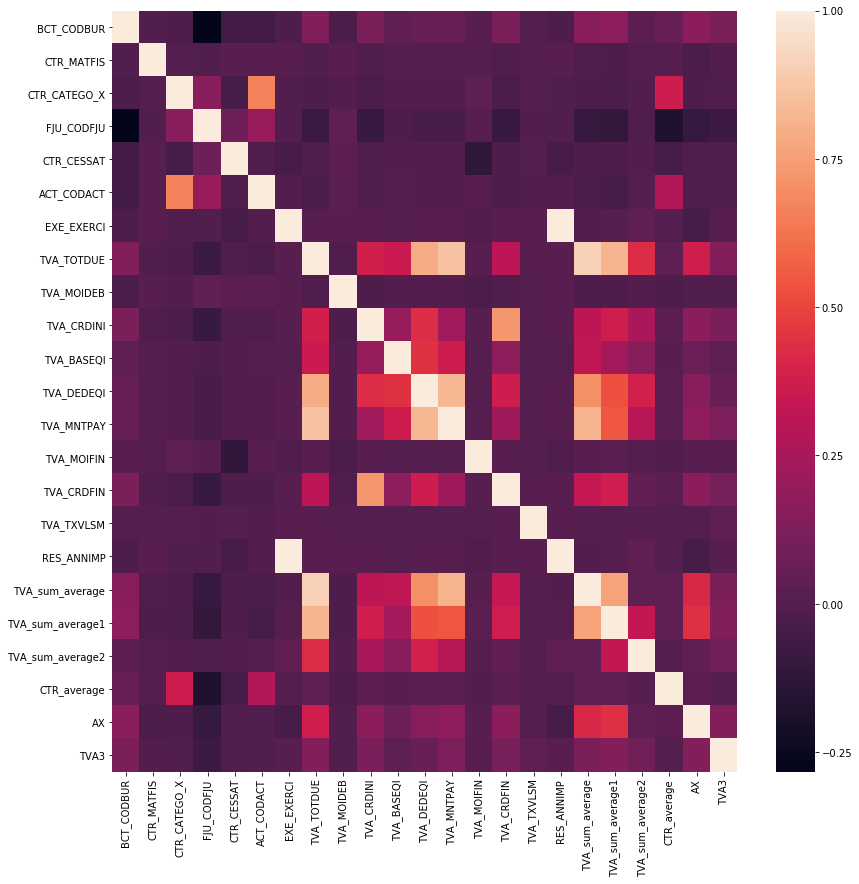

In [29]:
other = all_data
corr_matrix = all_data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix)

In [30]:
all_data.drop(['TVA_CRDFIN','BCT_CODBUR'],axis=1,inplace=True)

In [31]:
train_data = all_data[:len(train)]
test_data = all_data[len(train):]
y=target
X=train_data

In [32]:
X.head()

,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,EXE_EXERCI,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASEQI,...,TVA_MNTPAY,TVA_MOIFIN,TVA_TXVLSM,RES_ANNIMP,TVA_sum_average,TVA_sum_average1,TVA_sum_average2,CTR_average,AX,TVA3
0,14185,3,99,1,6101,2013,6422250.0,1.0,0.0,0.0,...,6412354.0,12.0,0.0,2013,5321250.0,681.142857,0.0,1.500000,1.228853e+07,0.0
1,6032,3,99,0,6271,2013,720000.0,1.0,0.0,0.0,...,720000.0,12.0,0.0,2013,1200000.0,0.000000,0.0,1.555556,2.870056e+06,0.0
2,8907,3,99,0,6102,2015,3831117.0,1.0,0.0,0.0,...,31150.0,12.0,0.0,2015,3192602.6,134801.295918,0.0,1.500000,2.336831e+08,0.0
3,5783,1,22,0,4403,2015,0.0,1.0,45425.0,0.0,...,0.0,12.0,0.0,2015,0.0,54684.102041,0.0,1.555556,2.336831e+08,0.0
4,1477,3,99,0,6312,2015,1319958.0,1.0,0.0,0.0,...,224442.0,12.0,0.0,2015,1099965.3,36641.510204,0.0,1.611111,4.320906e+06,0.0


In [33]:
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBRegressor
param= {'colsample_bytree': 0.7, 'learning_rate': 0.015, 'max_depth': 7,
        'min_child_weight': 6, 'n_estimators': 800, 'nthread': 4,
        'objective': 'reg:linear', 'silent': 1, 'subsample': 0.9}
xgb_other = XGBRegressor(**param)
xgb_other.fit(X,y)
pred = xgb_other.predict(test_data)


C:\Users\ASUS\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ASUS\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [34]:
submit=pd.DataFrame()
submit['id']=idd
submit['target']=pred

In [35]:
submit.head()

,id,target
0,test_id0,14.409633
1,test_id1,14.569518
2,test_id2,16.384995
3,test_id3,13.634653
4,test_id4,14.348216


In [36]:
submit.to_csv('submit.csv',index=False)